<a href="https://colab.research.google.com/github/kathiravans1984/TensorFlow/blob/main/SimpleTensorFlow_1Layer1Neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Simple single Layer Single Neuron Tensorflow

In [2]:
import tensorflow as tf

In [3]:
import numpy as np

celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


In [4]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

In [5]:
model = tf.keras.Sequential([l0])

In [6]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

These are used during training (model.fit(), below) to first calculate the loss at each point, and then improve it. In fact, the act of calculating the current loss of a model and then improving it is precisely what training is.

During training, the optimizer function is used to calculate adjustments to the model's internal variables. The goal is to adjust the internal variables until the model (which is really a math function) mirrors the actual equation for converting Celsius to Fahrenheit.

TensorFlow uses numerical analysis to perform this tuning, and all this complexity is hidden from you so we will not go into the details here. What is useful to know about these parameters are:

The loss function (mean squared error) and the optimizer (Adam) used here are standard for simple models like this one, but many others are available. It is not important to know how these specific functions work at this point.

One part of the Optimizer you may need to think about when building your own models is the learning rate (0.1 in the code above). This is the step size taken when adjusting values in the model. If the value is too small, it will take too many iterations to train the model. Too large, and accuracy goes down. Finding a good value often involves some trial and error, but the range is usually within 0.001 (default), and 0.1

In [8]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


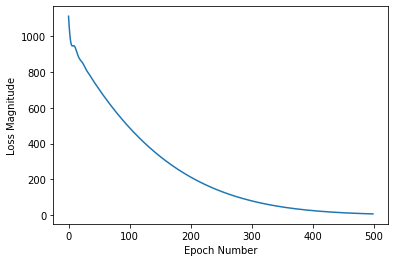

In [9]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [10]:
print(model.predict([100.0]))

[[211.33829]]


In [11]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.8201771]], dtype=float32), array([29.320585], dtype=float32)]


In [12]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[211.74742]]
Model predicts that 100 degrees Celsius is: [[211.74742]] degrees Fahrenheit
These are the l0 variables: [array([[-0.04739712, -0.38802135,  0.5360829 ,  0.77052253]],
      dtype=float32), array([ 2.5881596, -3.1648433,  3.2710319,  3.2569835], dtype=float32)]
These are the l1 variables: [array([[-0.4868762 , -1.3739381 , -1.4160476 ,  1.9753028 ],
       [-0.09047338,  0.34182143,  0.6148325 ,  0.07811492],
       [-0.5803699 , -0.03088638, -0.6606666 , -0.59410447],
       [-0.796908  ,  0.2387916 , -0.38438392,  0.1524713 ]],
      dtype=float32), array([-3.2267437, -2.9807436, -3.2223902,  2.469591 ], dtype=float32)]
These are the l2 variables: [array([[-0.8457372 ],
       [-0.33368134],
       [-1.4370515 ],
       [ 0.25516903]], dtype=float32), array([3.1821048], dtype=float32)]
